In [3]:
import torch
import matplotlib.pyplot as plt
import os
from PIL import Image
from transformers import AutoModelForVision2Seq, AutoProcessor
from torchvision import transforms

In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pre-trained model from the checkpoint 5 which is the best checkpoint
model_finetuned = AutoModelForVision2Seq.from_pretrained("model_resources")
model_finetuned.to(device)

checkpoint_path = "/home/ldomene/CAP-GIA/blip/checkpoints/epoch_5.pth"
state_dict = torch.load(checkpoint_path, map_location=device,weights_only=True)
model_finetuned.load_state_dict(state_dict, strict=False)
processor = AutoProcessor.from_pretrained("model_resources")


torch.Size([1, 3, 384, 384])


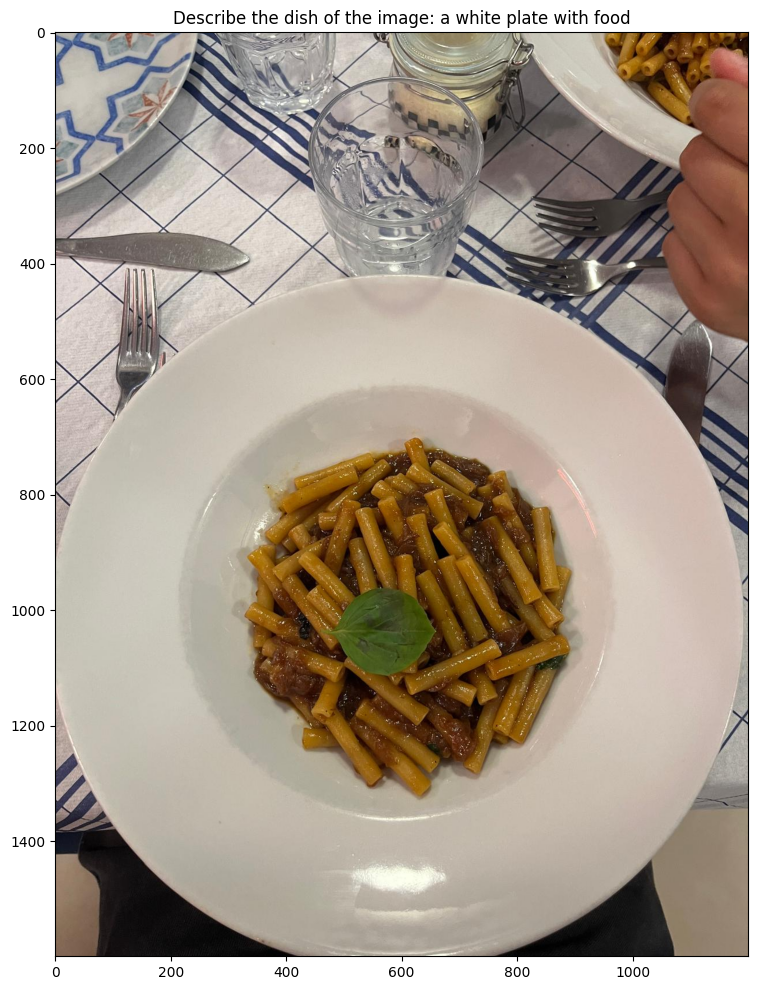

torch.Size([1, 3, 384, 384])


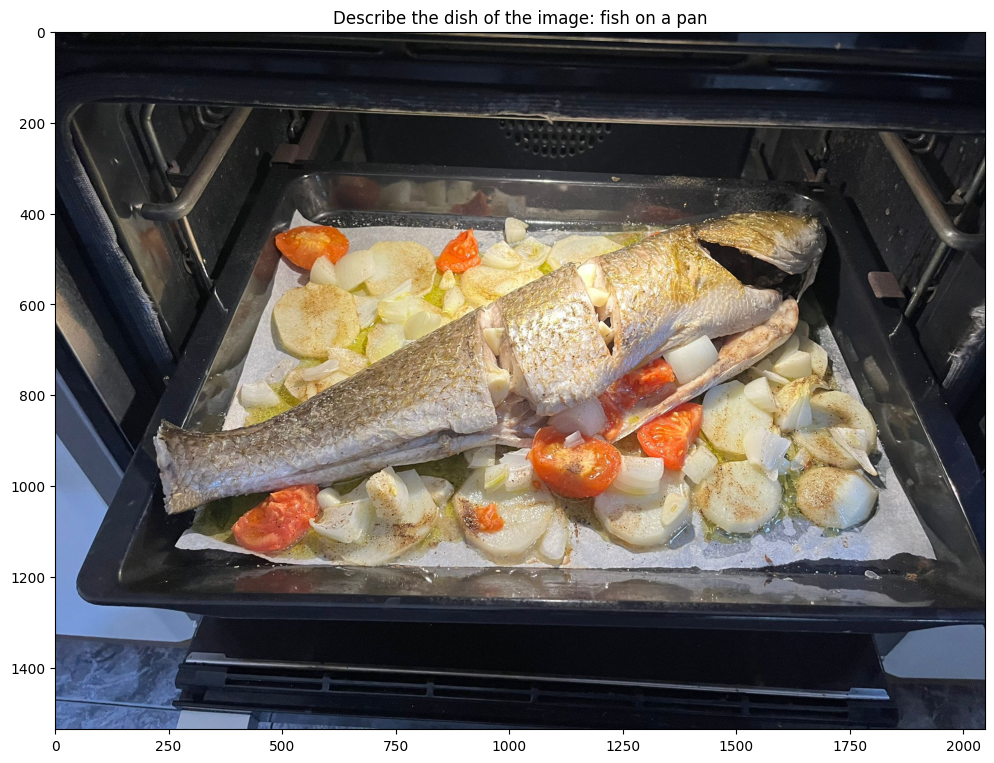

torch.Size([1, 3, 384, 384])


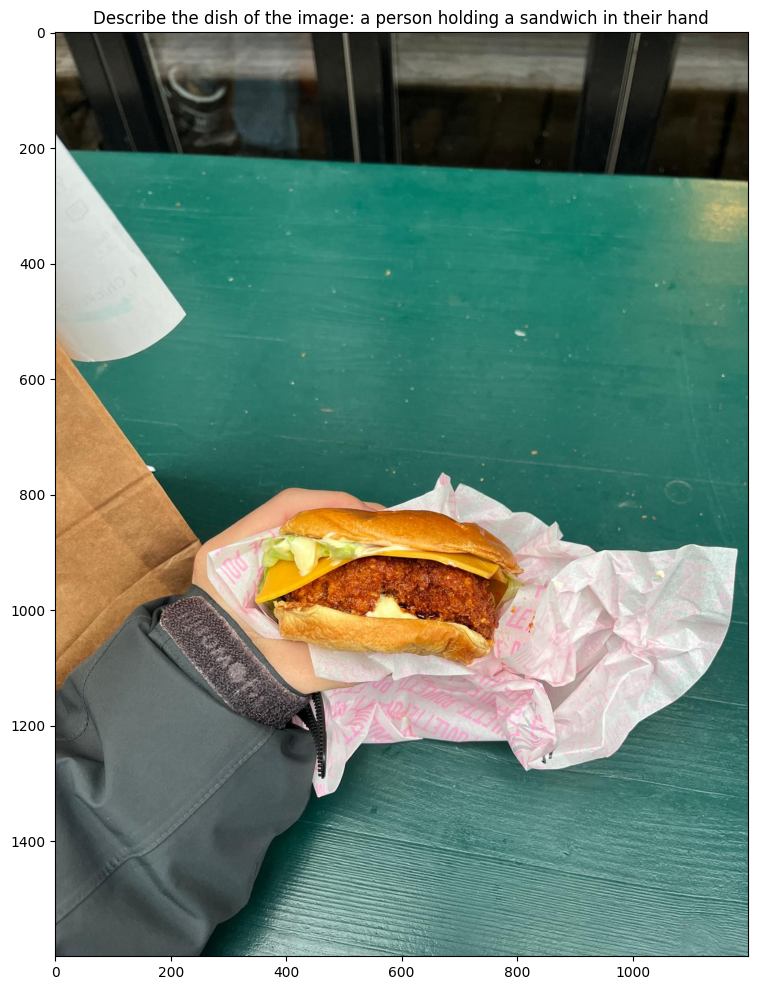

torch.Size([1, 3, 384, 384])


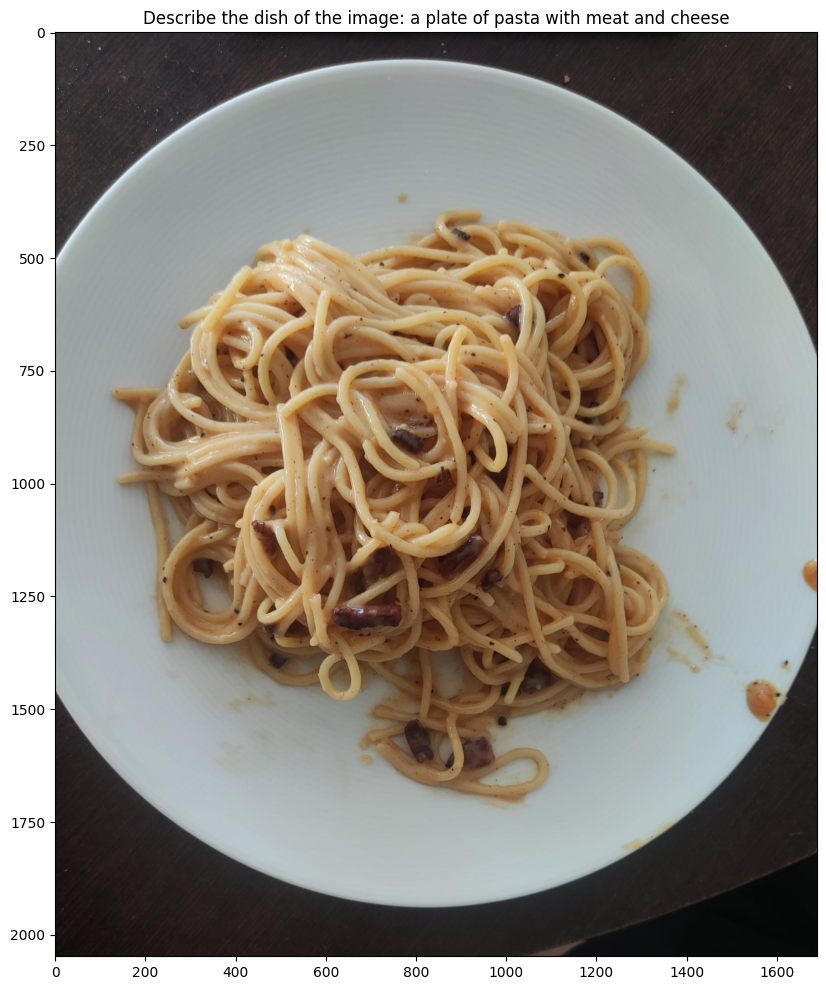

torch.Size([1, 3, 384, 384])


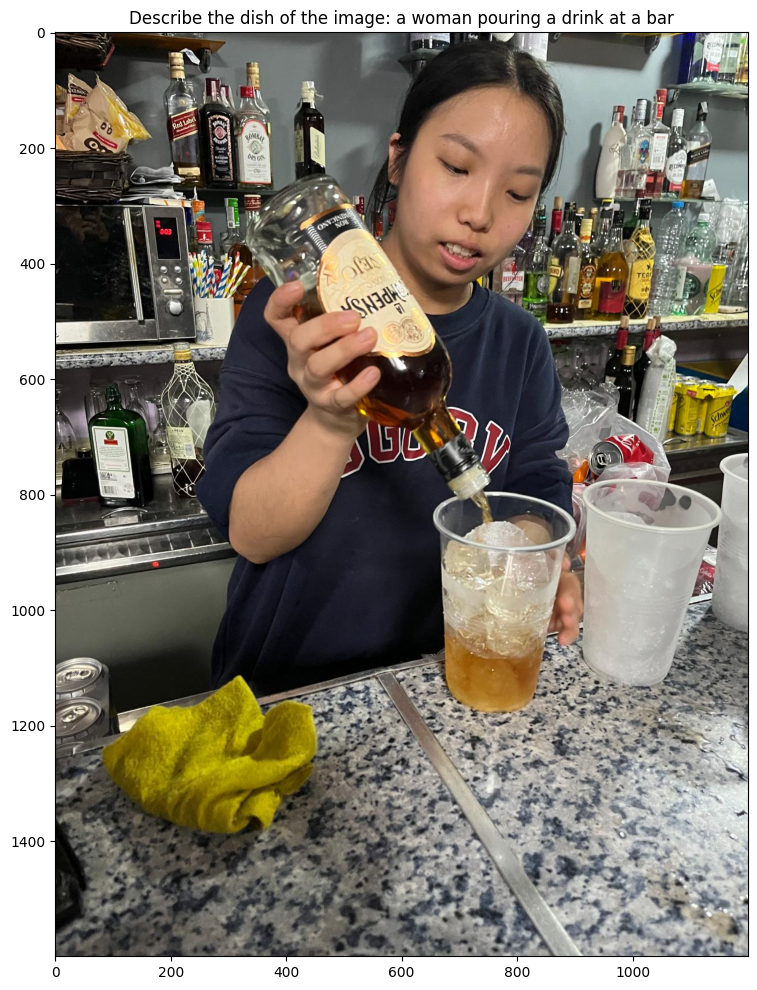

In [52]:
def read_images(path_directory):
    for file in os.listdir(path_directory): 
        if file.endswith(".jpg"):
            path = os.path.join(path_directory, file)
            caption = get_caption(path)
            plt.figure(figsize=(12, 12))
            plt.title(f"Describe the dish of the image: {caption}")
            plt.imshow(Image.open(os.path.join(path_directory, file)))
            plt.show()
            plt.close()

def get_caption(img_path):
   

    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
    
    print(inputs.pixel_values.shape)
    pixel_values = inputs.pixel_values
    generated_ids = model_finetuned.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_caption

read_images("/home/ldomene/CAP-GIA/test_real/")
